In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import regexp_tokenize

In [2]:
df = pd.read_csv('IMDB-Dataset 1.csv')
df2 = pd.read_csv('IMDB-Dataset2.csv')

In [3]:
df2.columns = [''] * len(df.columns) # for removing the existing column names of the dataframe

In [4]:
df2.columns =['review', 'sentiment']
df2.head(3)

,review,sentiment
0,This movie was bad from the start. The only pu...,negative
1,"God, I never felt so insulted in my whole life...",negative
2,Not being a fan of the Coen Brothers or George...,positive


In [5]:
#Merging both the dataframes

df = pd.concat([df,df2])
print("shape",df.shape)
df.head(2)

shape (49999, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive


In [6]:
#Deleting duplicate records

df.drop_duplicates(inplace = True)
print('=== Information of the dataset == \n\n',df.info())
print('\n\n === Shape of the Dataset ==>',df.shape)
df.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49581 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     49581 non-null  object
 1   sentiment  49581 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB
=== Information of the dataset == 

 None


 === Shape of the Dataset ==> (49581, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive


**We have now removed all the duplicate records, merged both the dataframe and as we can see we now have 49581 records**

In [7]:
# Lets check the sentiment column once.

df['sentiment'].value_counts()

positive    24884
negative    24697
Name: sentiment, dtype: int64

### As we see above this dataset has approximately equal number of both the type of sentiments hence their is no imbalance in the dataset.

In [8]:
#We are now tokenizing sentences from comments for futher processing

df['Tokenized sentences'] = df['review'].apply(sent_tokenize).apply(','.join)

In [11]:
df.head(3)

,review,sentiment,Tokenized sentences
0,One of the other reviewers has mentioned that ...,positive,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,"A wonderful little production.,<br /><br />The..."
2,I thought this was a wonderful way to spend ti...,positive,I thought this was a wonderful way to spend ti...


In [9]:
#Performing word tokenization

df['Tokenized Words'] = df['Tokenized sentences'].apply(word_tokenize)
df.head(4)

,review,sentiment,Tokenized sentences,Tokenized Words
0,One of the other reviewers has mentioned that ...,positive,One of the other reviewers has mentioned that ...,"[One, of, the, other, reviewers, has, mentione..."
1,A wonderful little production. <br /><br />The...,positive,"A wonderful little production.,<br /><br />The...","[A, wonderful, little, production., ,, <, br, ..."
2,I thought this was a wonderful way to spend ti...,positive,I thought this was a wonderful way to spend ti...,"[I, thought, this, was, a, wonderful, way, to,..."
3,Basically there's a family where a little boy ...,negative,Basically there's a family where a little boy ...,"[Basically, there, 's, a, family, where, a, li..."


In [31]:
#importing stopwords

from nltk.corpus import stopwords 
new_stopwords_list = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin','br','n','t','e','end','see','go','s',
                                                       'to','ca','n','ure','he','z','!','@','#','$','%','^','&','*','(',')'])

In [32]:
from nltk.stem import WordNetLemmatizer

lemma = WordNetLemmatizer()

def lem(text):
    return[lemma.lemmatize(w) for w in text if w not in new_stopwords_list]

In [33]:
df['Cleaned Text']= df['Tokenized Words'].apply(lem).apply(','.join)

In [34]:
df.head(3)

,review,sentiment,Tokenized sentences,Tokenized Words,Cleaned Text,Final,New
0,One of the other reviewers has mentioned that ...,positive,One of the other reviewers has mentioned that ...,"[One, of, the, other, reviewers, has, mentione...","One,reviewer,mentioned,watching,1,Oz,episode,'...","[ne, reviewer, mentioned, watching, z, episode...","[ne, reviewer, mentioned, watching, z, episode..."
1,A wonderful little production. <br /><br />The...,positive,"A wonderful little production.,<br /><br />The...","[A, wonderful, little, production., ,, <, br, ...","A,wonderful,little,production.,,,<,/,>,<,/,>,T...","[wonderful, little, production, he, filming, t...","[wonderful, little, production, filming, techn..."
2,I thought this was a wonderful way to spend ti...,positive,I thought this was a wonderful way to spend ti...,"[I, thought, this, was, a, wonderful, way, to,...","I,thought,wonderful,way,spend,time,hot,summer,...","[thought, wonderful, way, spend, time, hot, su...","[thought, wonderful, way, spend, time, hot, su..."


In [36]:
df.head(4)

,review,sentiment,Tokenized sentences,Tokenized Words,Cleaned Text,Final,New
0,One of the other reviewers has mentioned that ...,positive,One of the other reviewers has mentioned that ...,"[One, of, the, other, reviewers, has, mentione...","One,reviewer,mentioned,watching,1,Oz,episode,'...","[ne, reviewer, mentioned, watching, 1, z, epis...","[ne, reviewer, mentioned, watching, z, episode..."
1,A wonderful little production. <br /><br />The...,positive,"A wonderful little production.,<br /><br />The...","[A, wonderful, little, production., ,, <, br, ...","A,wonderful,little,production.,,,<,/,>,<,/,>,T...","[wonderful, little, production, he, filming, t...","[wonderful, little, production, filming, techn..."
2,I thought this was a wonderful way to spend ti...,positive,I thought this was a wonderful way to spend ti...,"[I, thought, this, was, a, wonderful, way, to,...","I,thought,wonderful,way,spend,time,hot,summer,...","[thought, wonderful, way, spend, time, hot, su...","[thought, wonderful, way, spend, time, hot, su..."
3,Basically there's a family where a little boy ...,negative,Basically there's a family where a little boy ...,"[Basically, there, 's, a, family, where, a, li...","Basically,'s,family,little,boy,Jake,think,'s,z...","[asically, s, family, little, boy, ake, think,...","[asically, family, little, boy, ake, think, zo..."


In [37]:
#For removing all numeric numbers


df['Final'] = df['Cleaned Text'].apply(lambda x: regexp_tokenize(x, "[^0-9]+")).apply(",".join)

df.head(4)

,review,sentiment,Tokenized sentences,Tokenized Words,Cleaned Text,Final,New
0,One of the other reviewers has mentioned that ...,positive,One of the other reviewers has mentioned that ...,"[One, of, the, other, reviewers, has, mentione...","One,reviewer,mentioned,watching,1,Oz,episode,'...","One,reviewer,mentioned,watching,,,Oz,episode,'...","[ne, reviewer, mentioned, watching, z, episode..."
1,A wonderful little production. <br /><br />The...,positive,"A wonderful little production.,<br /><br />The...","[A, wonderful, little, production., ,, <, br, ...","A,wonderful,little,production.,,,<,/,>,<,/,>,T...","A,wonderful,little,production.,,,<,/,>,<,/,>,T...","[wonderful, little, production, filming, techn..."
2,I thought this was a wonderful way to spend ti...,positive,I thought this was a wonderful way to spend ti...,"[I, thought, this, was, a, wonderful, way, to,...","I,thought,wonderful,way,spend,time,hot,summer,...","I,thought,wonderful,way,spend,time,hot,summer,...","[thought, wonderful, way, spend, time, hot, su..."
3,Basically there's a family where a little boy ...,negative,Basically there's a family where a little boy ...,"[Basically, there, 's, a, family, where, a, li...","Basically,'s,family,little,boy,Jake,think,'s,z...","Basically,'s,family,little,boy,Jake,think,'s,z...","[asically, family, little, boy, ake, think, zo..."


In [38]:
# Cleaning the final column again
df['Final'] = df['Final'].apply(lambda x: regexp_tokenize(x, "[^!@#$%&*(),.?<>;:''""\/{}=-_]+"))
df.head(4)

,review,sentiment,Tokenized sentences,Tokenized Words,Cleaned Text,Final,New
0,One of the other reviewers has mentioned that ...,positive,One of the other reviewers has mentioned that ...,"[One, of, the, other, reviewers, has, mentione...","One,reviewer,mentioned,watching,1,Oz,episode,'...","[ne, reviewer, mentioned, watching, z, episode...","[ne, reviewer, mentioned, watching, z, episode..."
1,A wonderful little production. <br /><br />The...,positive,"A wonderful little production.,<br /><br />The...","[A, wonderful, little, production., ,, <, br, ...","A,wonderful,little,production.,,,<,/,>,<,/,>,T...","[wonderful, little, production, he, filming, t...","[wonderful, little, production, filming, techn..."
2,I thought this was a wonderful way to spend ti...,positive,I thought this was a wonderful way to spend ti...,"[I, thought, this, was, a, wonderful, way, to,...","I,thought,wonderful,way,spend,time,hot,summer,...","[thought, wonderful, way, spend, time, hot, su...","[thought, wonderful, way, spend, time, hot, su..."
3,Basically there's a family where a little boy ...,negative,Basically there's a family where a little boy ...,"[Basically, there, 's, a, family, where, a, li...","Basically,'s,family,little,boy,Jake,think,'s,z...","[asically, s, family, little, boy, ake, think,...","[asically, family, little, boy, ake, think, zo..."


In [39]:
def stop(text):
    return[w for w in text if w not in new_stopwords_list]

In [40]:
df['New'] = df['Final'].apply(stop).apply(",".join)
df.head()

,review,sentiment,Tokenized sentences,Tokenized Words,Cleaned Text,Final,New
0,One of the other reviewers has mentioned that ...,positive,One of the other reviewers has mentioned that ...,"[One, of, the, other, reviewers, has, mentione...","One,reviewer,mentioned,watching,1,Oz,episode,'...","[ne, reviewer, mentioned, watching, z, episode...","ne,reviewer,mentioned,watching,episode,hooked,..."
1,A wonderful little production. <br /><br />The...,positive,"A wonderful little production.,<br /><br />The...","[A, wonderful, little, production., ,, <, br, ...","A,wonderful,little,production.,,,<,/,>,<,/,>,T...","[wonderful, little, production, he, filming, t...","wonderful,little,production,filming,technique,..."
2,I thought this was a wonderful way to spend ti...,positive,I thought this was a wonderful way to spend ti...,"[I, thought, this, was, a, wonderful, way, to,...","I,thought,wonderful,way,spend,time,hot,summer,...","[thought, wonderful, way, spend, time, hot, su...","thought,wonderful,way,spend,time,hot,summer,we..."
3,Basically there's a family where a little boy ...,negative,Basically there's a family where a little boy ...,"[Basically, there, 's, a, family, where, a, li...","Basically,'s,family,little,boy,Jake,think,'s,z...","[asically, s, family, little, boy, ake, think,...","asically,family,little,boy,ake,think,zombie,cl..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"Petter Mattei's ""Love in the Time of Money"" is...","[Petter, Mattei, 's, ``, Love, in, the, Time, ...","Petter,Mattei,'s,``,Love,Time,Money,'',visuall...","[etter, attei, s, ``, ove, ime, oney, visually...","etter,attei,``,ove,ime,oney,visually,stunning,..."


In [41]:
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

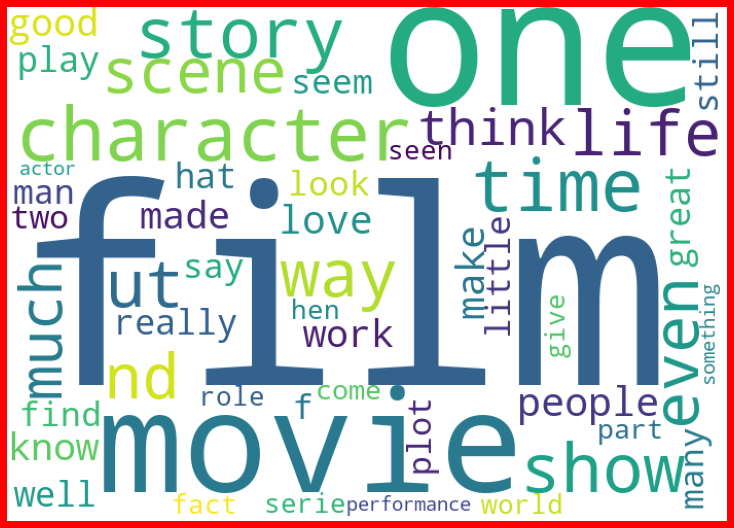

In [43]:
from wordcloud import WordCloud


reviews = df['New'][df['sentiment']=='positive']

reviews_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(reviews))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(reviews_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

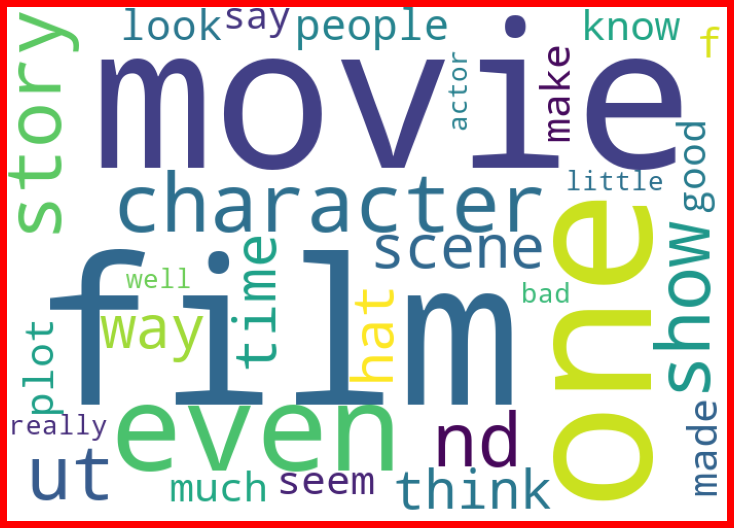

In [45]:
from wordcloud import WordCloud


reviews = df['New'][df['sentiment']=='negative']

reviews_cloud = WordCloud(width=700,height=500,background_color='white',max_words=30).generate(' '.join(reviews))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(reviews_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(stop_words='english',
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{2,}',  #vectorize 2-character words or more
    ngram_range=(3, 3))

x = df['New']
y = df['sentiment']

In [53]:
# Use the content column instead of our single text variable
x = tf.fit_transform(x)
x.shape

(49581, 4773671)

In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state = 100)

In [58]:
x.shape

(49581, 4773671)

**Building Our Model**

In [55]:
#Importing other necessary libraries

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve

In [57]:
mnb = MultinomialNB(fit_prior = True)
train = mnb.fit(x_train,y_train)
test = mnb.predict(x_test)

In [59]:
#Confusion Matrix for Naive Byes
print(confusion_matrix(y_test,test))

[[4481 1697]
 [1470 4748]]


In [61]:
print('---Accuracy Score for Naive Byes---\n\n',accuracy_score(y_test,test))
print('\n---Classification Report for Naive Byes---\n\n',classification_report(y_test,test))

---Accuracy Score for Naive Byes---

 0.744514359470797

---Classification Report for Naive Byes---

               precision    recall  f1-score   support

    negative       0.75      0.73      0.74      6178
    positive       0.74      0.76      0.75      6218

    accuracy                           0.74     12396
   macro avg       0.74      0.74      0.74     12396
weighted avg       0.74      0.74      0.74     12396



In [62]:
#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
params = {'alpha': list(np.arange(0.1,3,0.1))}
mnb_grid = GridSearchCV(MultinomialNB(fit_prior = True), param_grid= params, cv = 5, n_jobs=-1)

In [63]:
mnb_grid.fit(x_train,y_train)
print('Best Estimators == > \n', mnb_grid.best_params_)

Best Estimators == > 
 {'alpha': 0.6}


In [67]:
mnb_grid = mnb_clf.fit(x_train, y_train)
mnb_pred =  mnb_grid.predict(x_test)

In [68]:
print(confusion_matrix(y_test,mnb_pred))
print('---Accuracy Score for Naive Byes---\n\n',accuracy_score(y_test,mnb_pred))
print('\n---Classification Report for Naive Byes---\n\n',classification_report(y_test,mnb_pred))

[[4721 1457]
 [1726 4492]]
---Accuracy Score for Naive Byes---

 0.7432236205227493

---Classification Report for Naive Byes---

               precision    recall  f1-score   support

    negative       0.73      0.76      0.75      6178
    positive       0.76      0.72      0.74      6218

    accuracy                           0.74     12396
   macro avg       0.74      0.74      0.74     12396
weighted avg       0.74      0.74      0.74     12396

